In [ ]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/Speaker-Accent-Recognition
# dataset link : http://archive.ics.uci.edu/ml/datasets/Speaker+Accent+Recognition
# email : amirsh.nll@gmail.com

========== Test Features ============
            X1        X2         X3         X4         X5         X6  \
226   1.098864 -7.452423  17.066487  -7.314831   7.912809   0.381224   
302   5.077564 -5.482133   0.312714   9.662788  -6.881830  10.850248   
262  12.393615 -1.629321   1.030436  13.814292 -13.538767   5.814917   
180   5.178245 -5.049401   5.980721  10.562531  -8.000220  10.340584   
73    5.818891 -2.479246   2.087605   3.911587  -6.988192  10.437128   
..         ...       ...        ...        ...        ...        ...   
17   11.263467 -6.017982  -0.726262  11.959800  -5.667235  12.318475   
323  -2.112733 -0.038945   1.173896   1.263632   4.817348   7.840459   
320  -1.681729 -0.506247   2.135516   3.323995   1.080134   5.517213   
250   1.876146 -4.790968   7.706085   3.479158   4.455274   2.352220   
301   2.716551  1.924691  -0.823819   7.053833  -8.095601   9.130186   

            X7         X8         X9       X10       X11       X12  
226  -5.617393   4.760422  -

<ipython-input-2-f6e01fd88379>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-2-f6e01fd88379>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)
<ipython-input-2-f6e01fd88379>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)
<ipython-input-2-f6e01fd88379>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)
<ipython-input-2-f6e01fd88379>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

Text(0, 0.5, 'Mean Error')

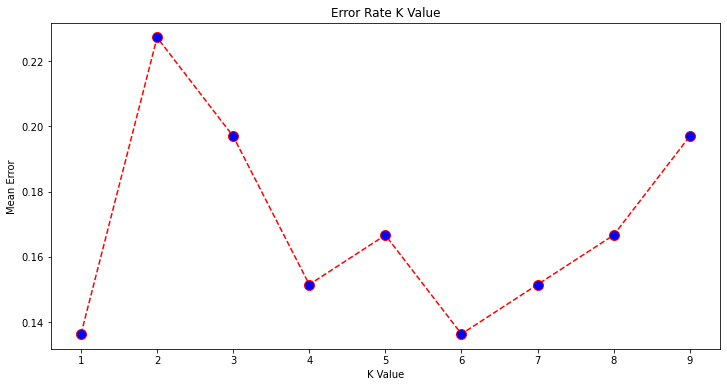

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('dataset.csv')


x = df.iloc[:, 1:] # features data
y = df.iloc[:, :1] # class data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)   # split train data and validation (test) data with test data including 20 percent of whole data


# ========== (Begin) This block of code perform normalizing or scaling the features which is a good practice so that all of features can be uniformly evaluated
# scaler = StandardScaler()
# scaler.fit(x_train)

# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# ========== (End)  Feature scaling

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print('========== Test Features ============')
print(x_test)

print('============ Predicted Values ===========')
print(y_pred)


# ============ Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\n\n============================   Comparing Error rate with different k value ============================= \n\n')

error = []
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    pred_i=pred_i.reshape(len(x_test),1)
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
